In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/loan.csv', usecols=['loan_amnt', 'term', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'application_type', 'loan_status'])


In [ ]:
df.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
df['term'] = le.fit_transform(df['term'])
df['grade'] = le.fit_transform(df['grade'])
df['emp_length'] = le.fit_transform(df['emp_length'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['application_type'] = le.fit_transform(df['application_type'])



In [ ]:
df['status'] = (df['loan_status'] == 'Fully Paid').astype(int)

X = df.drop(['loan_status', 'status'], axis=1)
y = df['status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



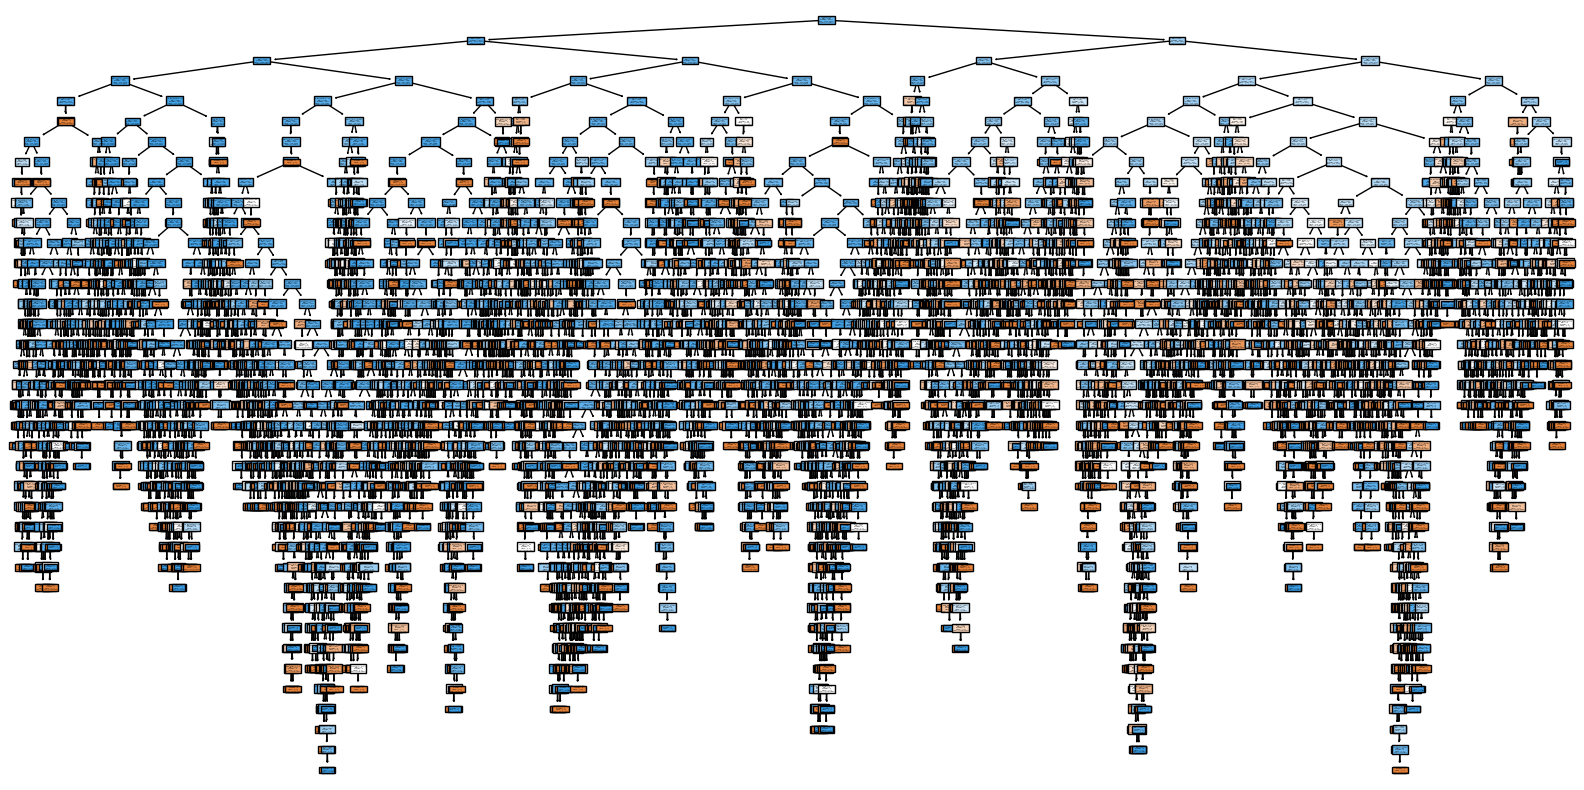

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.23      0.27      0.25      1272
           1       0.85      0.83      0.84      6457

    accuracy                           0.73      7729
   macro avg       0.54      0.55      0.54      7729
weighted avg       0.75      0.73      0.74      7729



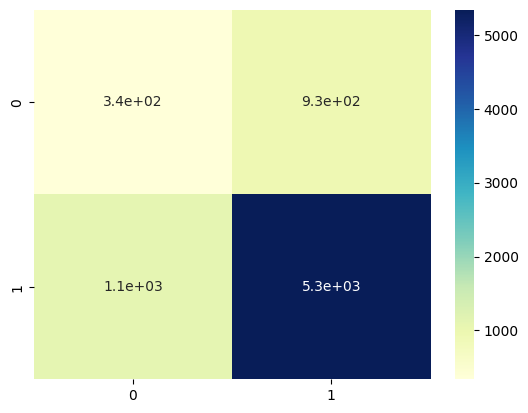

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Not Fully Paid', 'Fully Paid'])
plt.show()

y_dt_pred = dt_clf.predict(X_test)

print("Decision Tree Report:\n", classification_report(y_test, y_dt_pred))
dt_cm = confusion_matrix(y_test, y_dt_pred)
sns.heatmap(dt_cm, annot=True, cmap="YlGnBu")
plt.show()


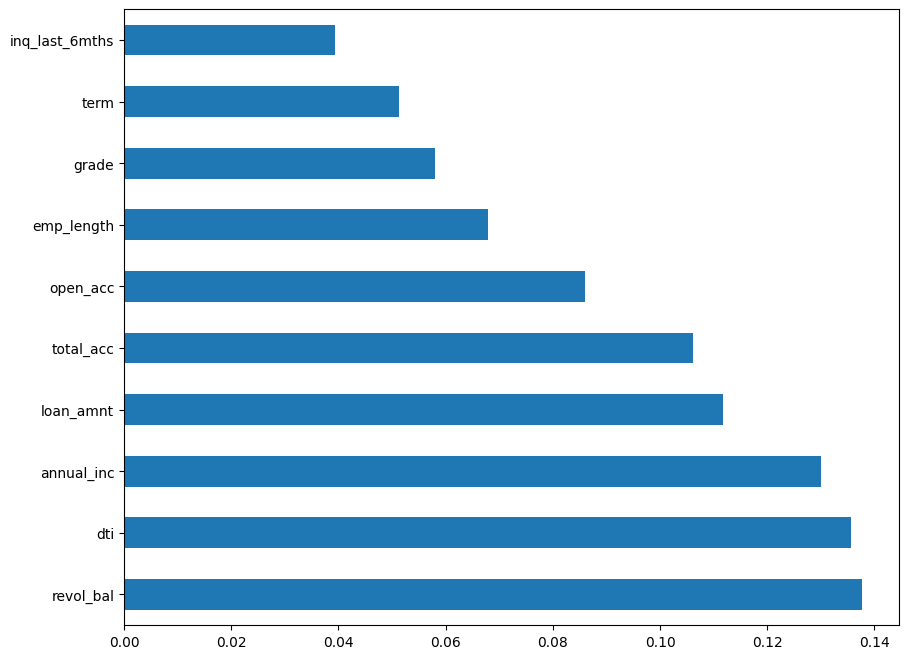

Random Forest Report:
               precision    recall  f1-score   support

           0       0.45      0.04      0.08      1272
           1       0.84      0.99      0.91      6457

    accuracy                           0.83      7729
   macro avg       0.64      0.52      0.49      7729
weighted avg       0.78      0.83      0.77      7729



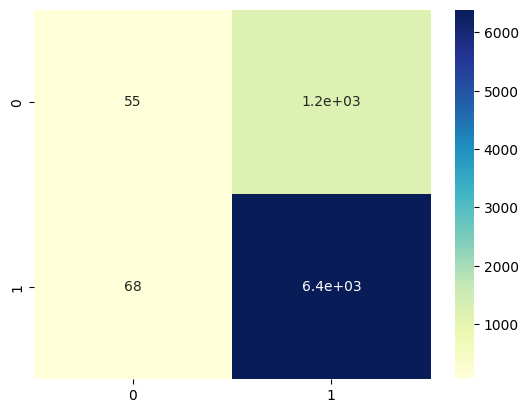

In [ ]:

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

y_rf_pred = rf_clf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_rf_pred))
rf_cm = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(rf_cm, annot=True, cmap="YlGnBu")
plt.show()



KNN Accuracy Score: 0.8095484538750162
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.06      0.09      1272
           1       0.84      0.96      0.89      6457

    accuracy                           0.81      7729
   macro avg       0.52      0.51      0.49      7729
weighted avg       0.73      0.81      0.76      7729

KNN Confusion Matrix:
[[  71 1201]
 [ 271 6186]]


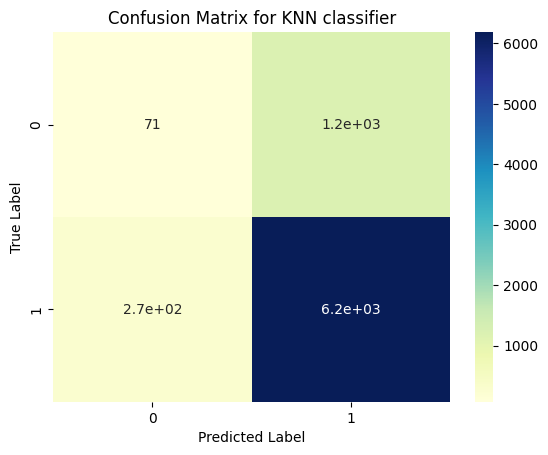

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

knn_y_pred = knn_clf.predict(X_test)
print('KNN Accuracy Score:', accuracy_score(y_test, knn_y_pred))
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))
print('KNN Confusion Matrix:')
print(confusion_matrix(y_test, knn_y_pred))
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix for KNN classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)

perceptron_y_pred = perceptron_clf.predict(X_test)
print('Perceptron Accuracy Score:', accuracy_score(y_test, perceptron_y_pred))
print('Perceptron Classification Report:')
print(classification_report(y_test, perceptron_y_pred))
print('Perceptron Confusion Matrix:')
print(confusion_matrix(y_test, perceptron_y_pred))

Perceptron Accuracy Score: 0.8352956397981628
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.00      0.00      1272
           1       0.84      1.00      0.91      6457

    accuracy                           0.84      7729
   macro avg       0.63      0.50      0.46      7729
weighted avg       0.77      0.84      0.76      7729

Perceptron Confusion Matrix:
[[   3 1269]
 [   4 6453]]


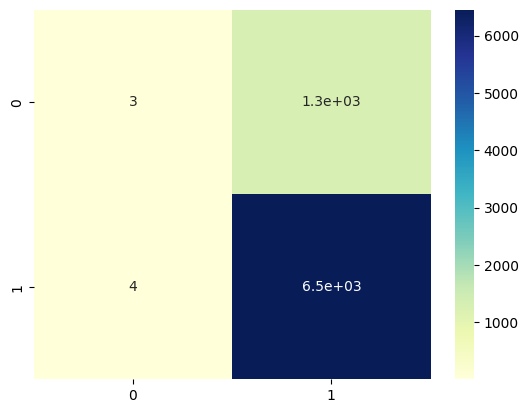

In [ ]:

pc_cm = confusion_matrix(y_test, perceptron_y_pred)
sns.heatmap(pc_cm, annot=True, cmap="YlGnBu")
plt.show()

There are more examples of one class than the other, which can cause the classifier to be biased towards the majority class. The classifier should perform well on all classes, not just one or a few so undersampling the majority class to balance the number of examples in each class.
With this technique we may improve the performance of the classifier and ensure that it performs well on all classes.

Perceptron Accuracy Score: 0.8283089662310777
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.03      0.06      1272
           1       0.84      0.99      0.91      6457

    accuracy                           0.83      7729
   macro avg       0.57      0.51      0.48      7729
weighted avg       0.75      0.83      0.77      7729



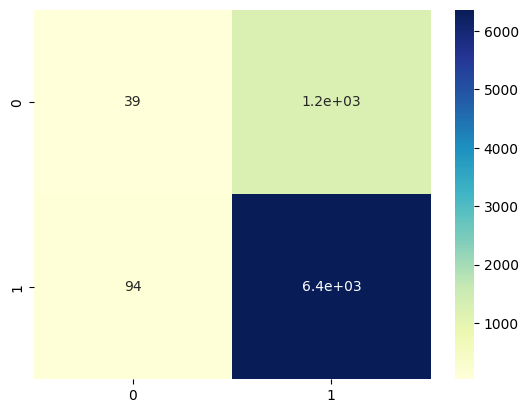

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
perceptron_clf = Perceptron()

perceptron_clf.fit(X_train_resampled, y_train_resampled)

perceptron_y_pred = perceptron_clf.predict(X_test)

print('Perceptron Accuracy Score:', accuracy_score(y_test, perceptron_y_pred))

print('Perceptron Classification Report:')
print(classification_report(y_test, perceptron_y_pred))

pc_cm = confusion_matrix(y_test, perceptron_y_pred)
sns.heatmap(pc_cm, annot=True, cmap="YlGnBu")
plt.show()


We got 82% accuracy after implimentation of undersampling technique to perceptron classifier.